### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [2]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [3]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
data.isna().sum()


vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

In [4]:
# данные пропущены только в 2 колонках
data[['passenger_count', 'distance_km']].isna().sum()

passenger_count    145864
distance_km        145864
dtype: int64

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [5]:
# пропуски до обработки
data.passenger_count.isna().sum()

145864

In [6]:
### Your code is here
top_in_passenger_count = data.passenger_count.value_counts().index[0]
data['passenger_count'] = data['passenger_count'].fillna(top_in_passenger_count)

print(f'Популярное значение колонки passenger_count {np.round(top_in_passenger_count, 2)}')
data.head()

Популярное значение колонки passenger_count 930.4


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
data.passenger_count.isna().sum()

0

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [8]:
### Your code is here

grouped_means = \
data.groupby(['vendor_id', 'store_and_fwd_flag','traffic_jam', 'month_2','month_3', 'month_4', 'month_5', 'month_6' ])['distance_km'].\
transform("mean")
data['distance_km'] = data['distance_km'].fillna(grouped_means)

In [9]:
### Убедимся, что пропусков не осталось
### Your code is here
data['distance_km'].isna().sum()


0

In [10]:
data[:20].to_csv('ML_L8_task6.csv', index=False, sep=';')
!cat ML_L8_task6.csv

vendor_id;passenger_count;store_and_fwd_flag;distance_km;log_trip_duration;anomaly;traffic_jam;day_of_week_1;day_of_week_2;day_of_week_3;day_of_week_4;day_of_week_5;day_of_week_6;hour_1;hour_2;hour_3;hour_4;hour_5;hour_6;hour_7;hour_8;hour_9;hour_10;hour_11;hour_12;hour_13;hour_14;hour_15;hour_16;hour_17;hour_18;hour_19;hour_20;hour_21;hour_22;hour_23;month_2;month_3;month_4;month_5;month_6
1;930.3997532751514;0;1.5004789467430026;6.1224928095143865;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;1;0;0;0
0;930.3997532751514;0;1.807119412113964;6.498282149476434;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1
1;930.3997532751514;0;6.392080252604317;7.661527081358517;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0
1;930.3997532751514;0;1.487154705417205;6.063785208687608;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;1;0;0
1;930.3997532751514;0;1.1899254482788029;6.077642243349034;0;0;0;0;0;0;1;0;0;0;0;0;0

In [11]:
X = data.drop(['log_trip_duration'], axis=1)
y = data['log_trip_duration']

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [12]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


model = LinearRegression()
cross_val_error = cross_validate(model, X, y, 
                                 scoring='neg_mean_squared_error',
                                 cv = selector)
cross_val_error = np.mean(cross_val_error['test_score'])

print(f"MSLE на Кросс-валидации: {np.round(-cross_val_error,3)}")

MSLE на Кросс-валидации: 0.431


In [13]:
cross_val_error

-0.4309125167796151

In [14]:
# losses_test_1 = []
# losses_train_1 = []

# for train_index_1, test_index_1 in selector.split(X):
#     X_train_1_, X_test_1_ = X.values[train_index_1], X.values[test_index_1]
#     Y_train_1_, Y_test_1_ = y.values[train_index_1], y.values[test_index_1]
    
#     model_1 = LinearRegression()
#     model_1.fit(X_train_1_, Y_train_1_)
    
#     losses_train_1.append(np.mean((model_1.predict(X_train_1_) - Y_train_1_) ** 2))
#     losses_test_1.append(np.mean((model_1.predict(X_test_1_) - Y_test_1_) ** 2))
    
# cross_val_error = np.mean(losses_train_1)
# cross_val_error_test = np.mean(losses_test_1)
# print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")
# print(f"MSLE на тесте: {round(cross_val_error_test, 3)}")

### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

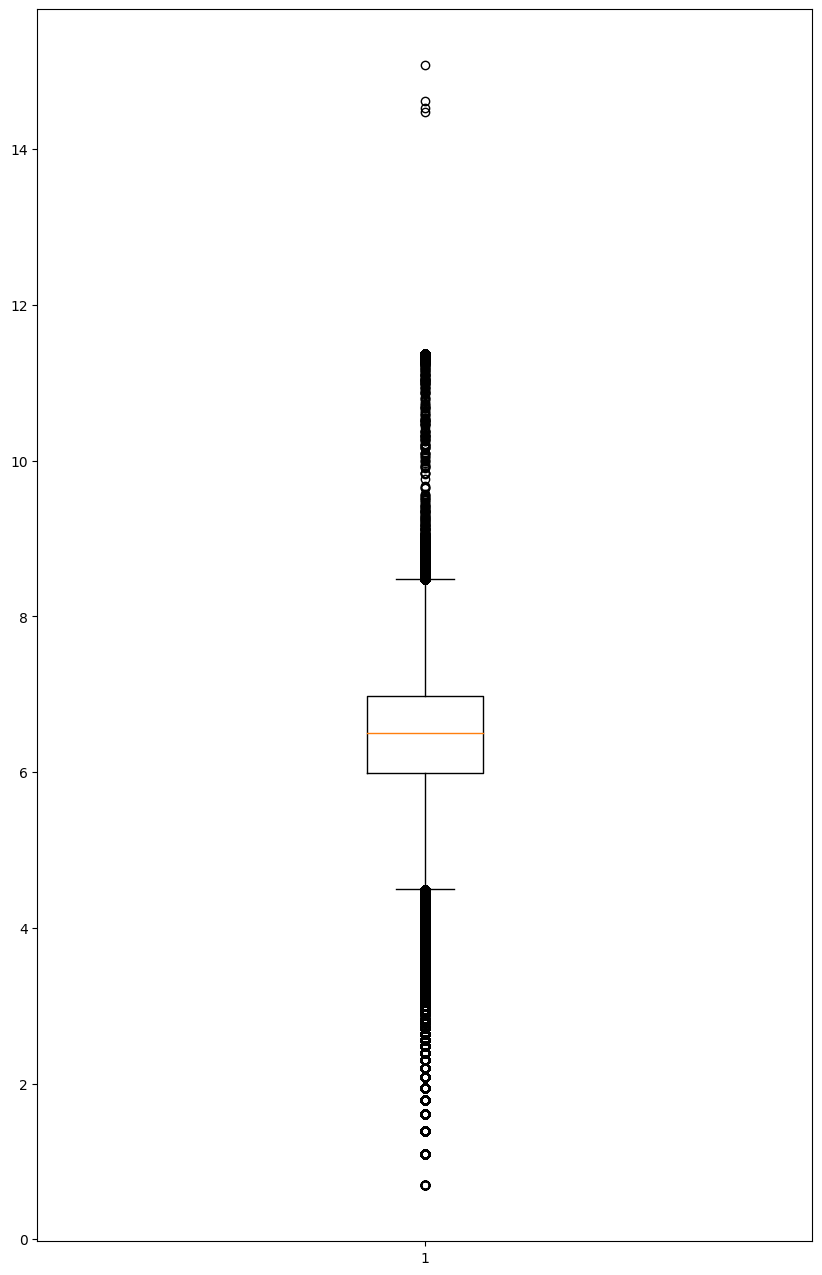

In [15]:
import matplotlib.pyplot as plt

### Your code is here
fig  = plt.figure()

fig.set_size_inches((10,16))

plt.boxplot(data['log_trip_duration'].values)

plt.show()


Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [16]:
### Your code is here
q_high = data.log_trip_duration.quantile(0.995)
q_low = data.log_trip_duration.quantile(0.005)
data_2 = data[(data.log_trip_duration < q_high) & (data.log_trip_duration > q_low)]

In [17]:
data.shape, data_2.shape

((1458644, 41), (1444013, 41))

In [18]:
X_2 = data_2.drop(['log_trip_duration'], axis=1)
y_2 = data_2['log_trip_duration']

Снова замерьте качество на кросс-валидации, используя старый selector

In [19]:
### Your code is here

model_2 = LinearRegression()
cross_val_error_2 = cross_validate(model_2, X_2, y_2, 
                                 scoring='neg_mean_squared_error',
                                 cv = selector)
cross_val_error_2 = np.mean(cross_val_error_2['test_score'])

print(f"MSLE на Кросс-валидации: {np.round(-cross_val_error_2,3)}")


MSLE на Кросс-валидации: 0.35


In [20]:
# losses_test_2 = []
# losses_train_2 = []

# for train_index_2, test_index_2 in selector.split(X_2):
#     X_train_2_, X_test_2_ = X_2.values[train_index_2], X_2.values[test_index_2]
#     Y_train_2_, Y_test_2_ = y_2.values[train_index_2], y_2.values[test_index_2]
    
#     model_2 = LinearRegression()
#     model_2.fit(X_train_2_, Y_train_2_)
    
#     losses_train_2.append(np.mean((model_2.predict(X_train_2_) - Y_train_2_) ** 2))
#     losses_test_2.append(np.mean((model_2.predict(X_test_2_) - Y_test_2_) ** 2))
    
# cross_val_error_2 = np.mean(losses_train_2)
# cross_val_error_test_2 = np.mean(losses_test_2)
# print(f"MSLE на Кросс-валидации: {round(cross_val_error_2, 3)}")
# print(f"MSLE на тесте: {round(cross_val_error_test_2, 3)}")